In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
data = pandas.read_csv('D:\ML\ML_HW2\Data\Quality.csv')

In [3]:
c0 = data[data['class'] == 0]
c1 = data[data['class'] == 1]

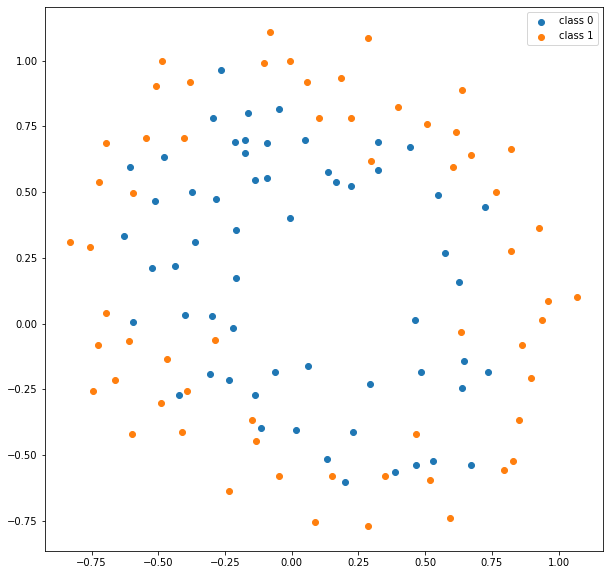

In [4]:
plt.figure(figsize=(10,10))

plt.scatter('x' ,'y', data = c1)
plt.scatter('x' ,'y', data = c0)
plt.legend(["class 0" , "class 1"])
plt.show()

In [5]:
class LogisticRegression:
    w = np.array
    b = 0
    def sigmoid(self,z):
        return 1.0/(1 + np.exp(-z))

    def loss(self,y, y_hat):
        loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss
    def gradients(self,X, y, y_hat):

        m = X.shape[0]
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y)) 
        
        return dw, db

    def normalize(self,X):
        m, n = X.shape
        for i in range(n):
            X = (X - X.mean(axis=0))/X.std(axis=0)
        return X

    def train(self,X, y, bs = 20, epochs = 100, lr = 0.01):
        m, n = X.shape
        w = np.zeros((n,1))
        b = 0
        y = y.values.reshape(m,1)
        x = self.normalize(X)
        losses = []
        for epoch in range(epochs):
            for i in range((m-1)//bs + 1):
                start_i = i*bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[start_i:end_i]
                y_hat = self.sigmoid(np.dot(xb, w) + b)
                dw, db = self.gradients(xb, yb, y_hat)
                w -= lr*dw
                b -= lr*db
            l = self.loss(y, self.sigmoid(np.dot(X, w) + b))
            losses.append(l)
        self.w = w
        self.b = b
        return w, b, losses

    def predict(self, X):
        x = self.normalize(X)
        preds = np.dot(X, self.w) + self.b
        pred_class = []
        pred_class = [1 if i > 0.5 else 0 for i in preds]

        return np.array(preds)

In [6]:
poly1 = PolynomialFeatures(degree  = 5, include_bias=False)

#Extract Polynomial features
poly1.fit(data[['x','y']])

#initialize log reg
reg1 = LogisticRegression(max_iter = 1000)

data_transformed = poly1.transform(data[['x','y']])

#Fit the data and get coefficients
reg1.fit(data_transformed,data['class'])

print("The Accuracy is:")
print(reg1.score(data_transformed,data['class']))

The Accuracy is:
0.8389830508474576


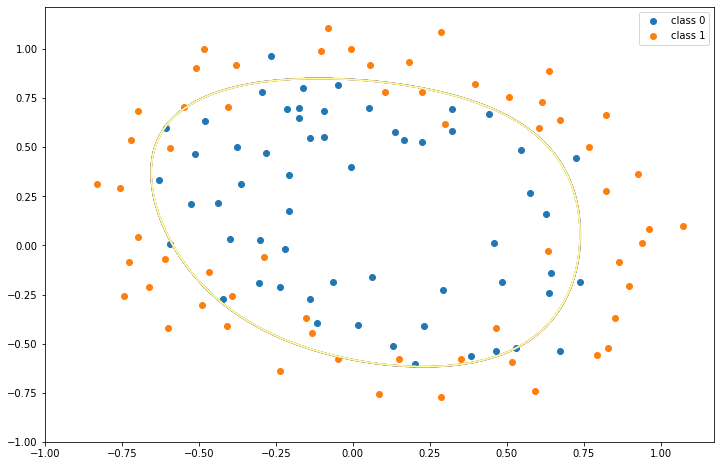

In [7]:
xx, yy = np.meshgrid(np.arange(-1, 1, 0.001),
                     np.arange(-1, 1, 0.001))

Z = reg1.predict(poly1.transform(np.c_[xx.ravel(),yy.ravel()]))
plt.figure(figsize=(12,8))
plt.scatter('x' ,'y', data = c1)
plt.scatter('x' ,'y', data = c0)
plt.legend(["class 0" , "class 1"])

Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired) 

plt.show()